## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


## Loading the dataset

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
##Statistical information
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
##Shape of the data

df.shape

(8523, 12)

In [5]:
##To get the various information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
##Checking the unique values in the dataset

for col in df.columns:
    print(col,df[col].nunique())
    print('------------------------------')
    
##OR
##df.apply(lambda x:len(x.unique()))

Item_Identifier 1559
------------------------------
Item_Weight 415
------------------------------
Item_Fat_Content 5
------------------------------
Item_Visibility 7880
------------------------------
Item_Type 16
------------------------------
Item_MRP 5938
------------------------------
Outlet_Identifier 10
------------------------------
Outlet_Establishment_Year 9
------------------------------
Outlet_Size 3
------------------------------
Outlet_Location_Type 3
------------------------------
Outlet_Type 4
------------------------------
Item_Outlet_Sales 3493
------------------------------


## Preprocessing the data

In [7]:
#Finding out the null values in the dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
##Listing out the categorical variables

cat_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_cols.append(x)
        
cat_cols
    

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
cat_cols2 = df.select_dtypes(['object'])
cat_cols2

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [10]:
##we don't need few of the varibles as they have so many unique values

cat_cols.remove('Item_Identifier')
cat_cols.remove('Outlet_Identifier')
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
##to check the different catogories in the catogorical variables

for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [12]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [13]:
##Imputing the missing values in numerical columns

#df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [14]:
##Imputing the missing values in 'Item_weight' by considering 'Item_Identifier'

item_mean_weight = df.pivot_table(values = 'Item_Weight', index='Item_Identifier')
item_mean_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [15]:
item_mean_weight.index

Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1555)

In [16]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [17]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_mean_weight:
            df['Item_Weight'][i] = item_mean_weight.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i]=np.mean(df['Item_Weight'])

In [18]:
df.Item_Weight.isnull().sum()

0

In [19]:
#what is the most frequent in 'Outlet_Size'

df['Outlet_Size'].mode()[0]

'Medium'

In [20]:
##Imputing the missing values in 'Outlet_size'
#Here we handle missing values based on 'Outlet_Type'
outlet_size_mode = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [21]:
miss_bool = df['Outlet_Size'].isnull()
miss_bool

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [22]:
df.loc[miss_bool,'Outlet_Size']=df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [23]:
df['Outlet_Size'].isnull().sum()

0

In [24]:
# 'Item_visibility' has 0's in the values and substituting them with the mean value
sum(df['Item_Visibility']==0)

526

In [25]:
df.loc[df['Item_Visibility']==0,'Item_Visibility']=np.mean(df['Item_Visibility'])

In [26]:
sum(df['Item_Visibility']==0)

0

In [27]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
##Combining the same catogiers in 'Item_Fat_Content'

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Forming New features from existing features

From `Item_identifier` we can extract new categories like 'FD' - Food, 'NC'-Non-Consumable and 'DR'-Drinks and create a new feature. 

In [29]:
new = []

for x in df['Item_Identifier']:
    extract = x[:2]
    new.append(extract)
df['New_Item_type']=new


#OR
#df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
#df['New_Item_Type']

In [30]:
df['New_Item_type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_type, Length: 8523, dtype: object

In [31]:
df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_type, dtype: int64

In [32]:
df.loc[df['New_Item_type']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

Creating a new feature from `Outlet_Establishment_Year` which indicates the no.year since 2013. This data is collected in the year 2013. Hence we calculate the years of estlablishment. Hence the model performance will not effect due to the large values in `Outlet_Establishment_Year`

In [33]:
df['Outlet_Years']=2013-df['Outlet_Establishment_Year']
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

## Exploratory Data Analysis

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


#### Analysing the Numerical Variables

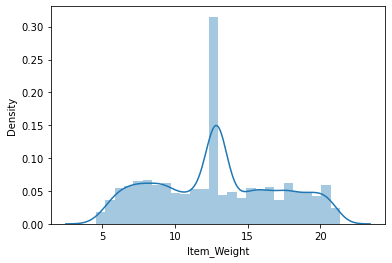

In [35]:
sns.distplot(df['Item_Weight']);

`Item_Weight` has most of the values as mean and most of values are ranfing between 2 and 20

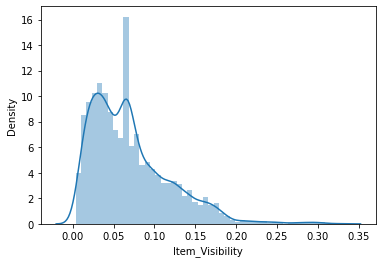

In [36]:
sns.distplot(df['Item_Visibility']);

There is less skewness in `Item_Visibility` and more values are about 0.75 because all the zeros been substituted as mean.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

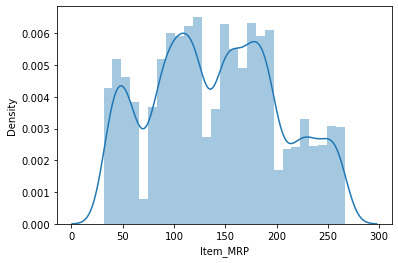

In [37]:
sns.distplot(df['Item_MRP'])

The price of the products ranges between 30 and 275 and it can be observed that based on the MRP the products can be split into 4 categories. products having range 30-75, 75-125, 125-200, 200-275 can be created as a new feature for having new insights from data.

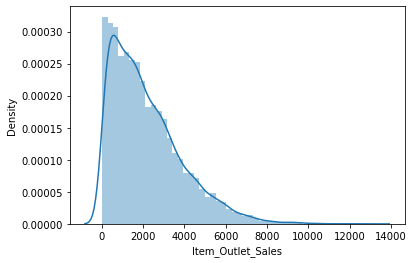

In [38]:
sns.distplot(df['Item_Outlet_Sales']);

Here the distribution of `Item_Outlet_Sales` is Right skewed. Hence we need to standardise it. Log transformation is applied in order to scale the values in `Item_Outlet_Sales`.

In [39]:
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

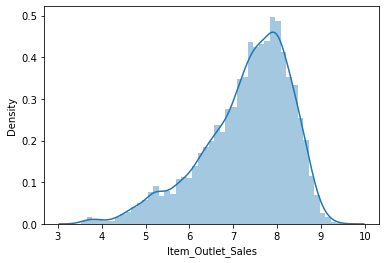

In [40]:
sns.distplot(df['Item_Outlet_Sales']);

After the transformation the `Item_Outlet_Sales` are on the minimal range and bit near to normal distribution.

#### Analysing the categorical Variable

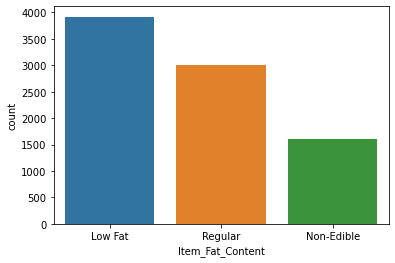

In [41]:
sns.countplot(df['Item_Fat_Content']);

Most of the products are Low fat products and very few are Non-Edible products.

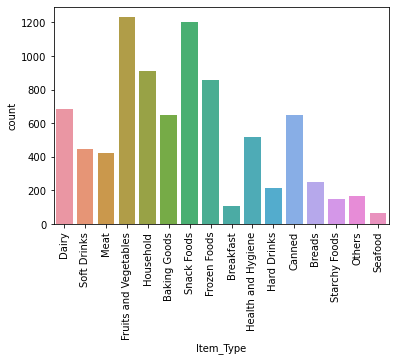

In [42]:
list_labels = list(df['Item_Type'].unique())
visual = sns.countplot(df['Item_Type']);
visual.set_xticklabels(labels=list_labels,rotation=90);

Large amount of distribution belong to food products.

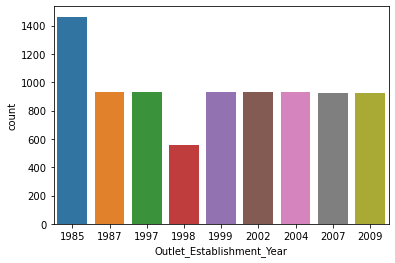

In [43]:
sns.countplot(df['Outlet_Establishment_Year']);

Mostly Same frequent number of stores are establised every year, but in year 1985 more number of stores are opened. 

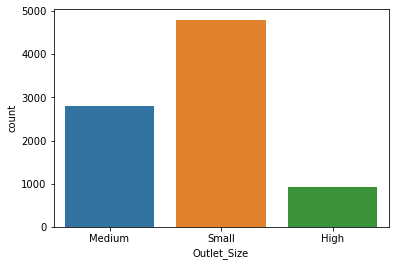

In [44]:
sns.countplot(df['Outlet_Size']);

Most of the stores are of Small size and very few are like around 100 stores are Large sized.

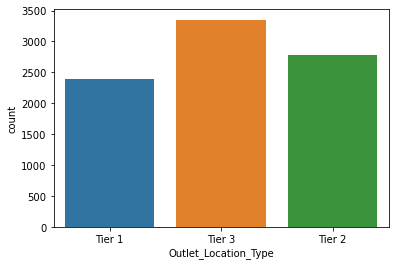

In [45]:
sns.countplot(df['Outlet_Location_Type']);

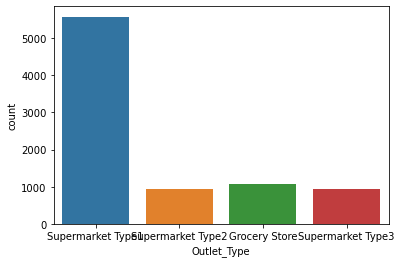

In [46]:
sns.countplot(df['Outlet_Type']);

Most of the products are from Supermarket Type-1

## Correlation Analysis of the data

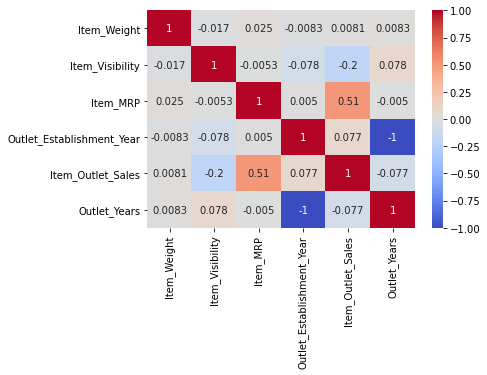

In [47]:
correlation = df.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm');

Here `Outlet_Establishment_Year` and `Outlet_Years` are higly correlated, because `Outlet_Years` is derived from `Outlet_Establishment_Year`. The variable which is contributing to the target variable is `Item_MRP`.

## Handling the Categorical varaibles

In [48]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


#### Label Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Outlet'] = label_encoder.fit_transform(df['Outlet_Identifier'])

In [52]:
df['Outlet_Identifier'].value_countscounts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [54]:
df['Outlet'].value_counts()

5    935
1    932
8    930
9    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet, dtype: int64

In [55]:
df.shape

(8523, 15)

In [56]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

We can preform target mean encoding to combine the categories in `Item_Type`. But for simplycity proceeding with label encoding.

In [57]:
df['Item_Type'] = label_encoder.fit_transform(df['Item_Type'])

In [58]:
df['Item_Type']

0        4
1       14
2       10
3        6
4        9
        ..
8518    13
8519     0
8520     8
8521    13
8522    14
Name: Item_Type, Length: 8523, dtype: int32

## Onehot Encoding

In [60]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_type', 'Outlet_Years',
       'Outlet'],
      dtype='object')

In [61]:
df = pd.get_dummies(df,columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_type_Drinks,New_Item_type_Food,New_Item_type_Non-Consumable
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


## Splitting the data into features and target

In [62]:
X = df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [63]:
print(X.shape)
print(y.shape)

(8523, 22)
(8523,)


## Model Training

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

##Defining a function for model training
def train(model, X, y):
    #model training
    model.fit(X,y)
    
    #Predict on training set
    predictions = model.predict(X)
    
    #Perform cross-validation
    cv_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    
    print('Model Report')
    print('MSE:',mean_squared_error(y,predictions))
    print('CV Score:',cv_score)

## Linear Regression

Model Report
MSE: 0.2880679898470292
CV Score: 0.2892519505256316


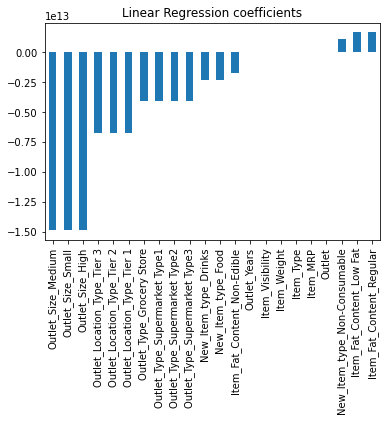

In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model,X,y)
coefficients = pd.Series(model.coef_,X.columns).sort_values()
coefficients.plot(kind='bar',title='Linear Regression coefficients');

Model Report
MSE: 0.4280298560568348
CV Score: 0.4289289251562642


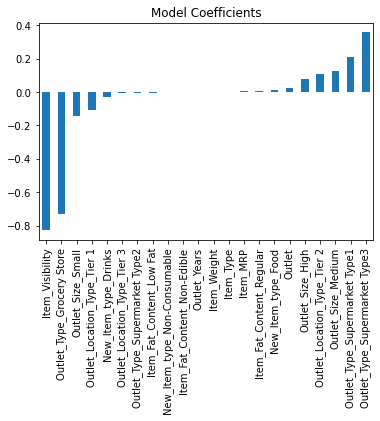

In [71]:

model = Ridge(normalize=True)
train(model, X, y)
coefficients = pd.Series(model.coef_, X.columns).sort_values()
coefficients.plot(kind='bar', title="Model Coefficients");

Model Report
MSE: 0.7628688679102086
CV Score: 0.7630789166281843


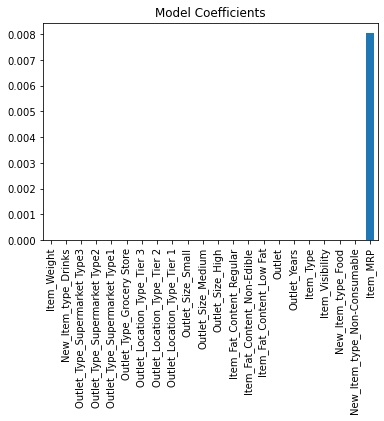

In [72]:
model = Lasso()
train(model, X, y)
coefficients = pd.Series(model.coef_, X.columns).sort_values()
coefficients.plot(kind='bar', title="Model Coefficients");

Model Report
MSE: 5.5534030638578795e-34
CV Score: 0.5816375757296024


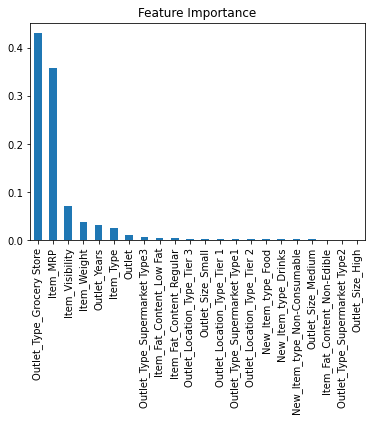

In [73]:

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance");

Model Report
MSE: 0.042465811998665
CV Score: 0.310401047948648


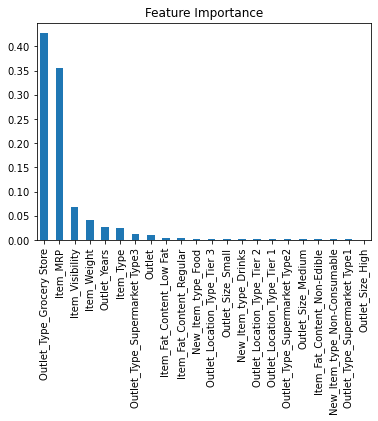

In [74]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance");

Model Report
MSE: 1.0418489584965893e-28
CV Score: 0.3311150768195971


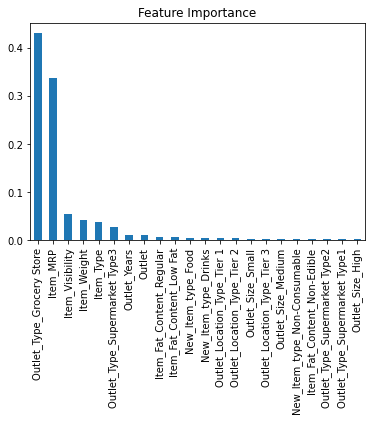

In [75]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance");